# Final Project

### Data

In [165]:
# Import libraries
import pandas as pd
import numpy as np
import sys

'''
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import seaborn as sns
'''

import os
import matplotlib.pyplot as plt
import seaborn as sns

import json

# 1. Load global data from API

In [166]:
endpoint = 'https://api.covid19api.dev/'

body = {
"username":"testapi1",
"password":"coronavirus19"
}


import requests
s=requests.post(url=f"{endpoint}token", data=body).content

d = json.loads(s)
token = d['Document']

In [167]:



urls = {}
urls["url_confirmed"] = 'time_series_confirmed_global'
urls["url_recovered"] = 'time_series_recovered_global'
urls["url_deaths"] = 'time_series_deaths_global'


dfs = {}

for key, value in urls.items():

    headers={'Authorization': f'Bearer {token}'}
    r = requests.get(f"{endpoint}{value}", headers=headers)
    x = r.json()
    dfs[f"df_{key[4:]}"] = pd.DataFrame(x['Document'])
    
    
print(dfs.keys())



dict_keys(['df_confirmed', 'df_recovered', 'df_deaths'])


In [168]:
dfs['df_confirmed'].head()

,id,province_state,country_region,latitude,longitude,jan222020,jan232020,jan242020,jan252020,jan262020,...,apr232021,apr242021,apr252021,apr262021,apr272021,apr282021,apr292021,apr302021,may012021,may022021
0,0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,...,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122
1,1,0,Albania,41.15330,20.168300,0,0,0,0,0,...,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238
2,2,0,Algeria,28.03390,1.659600,0,0,0,0,0,...,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522
3,3,0,Andorra,42.50630,1.521800,0,0,0,0,0,...,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282
4,4,0,Angola,-11.20270,17.873900,0,0,0,0,0,...,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993


## Data transformation: Date from columns to rows. There will be two columns: Date and Confirmed, Death or Recovered

In [169]:
dfs_melted = {}
for key, value in dfs.items():
    dfs_melted[key] = value.melt(id_vars=['id', 'province_state', 'country_region', 'latitude', 'longitude'], var_name='Date',
                  value_name=f'{key[3:]}')

dfs_melted.keys()

dict_keys(['df_confirmed', 'df_recovered', 'df_deaths'])

In [191]:
for k, v in dfs_melted.items():
    print(f"Shape: {df.shape}")
    dfs_melted[k] = v.drop('id', 1)
    print(dfs_melted[k].head())


Shape: (128425, 6)
  province_state country_region  latitude  longitude       Date  confirmed
0              0    Afghanistan  33.93911  67.709953  jan222020          0
1              0        Albania  41.15330  20.168300  jan222020          0
2              0        Algeria  28.03390   1.659600  jan222020          0
3              0        Andorra  42.50630   1.521800  jan222020          0
4              0         Angola -11.20270  17.873900  jan222020          0
Shape: (128425, 6)
  province_state country_region  latitude  longitude       Date  recovered
0              0    Afghanistan  33.93911  67.709953  jan222020          0
1              0        Albania  41.15330  20.168300  jan222020          0
2              0        Algeria  28.03390   1.659600  jan222020          0
3              0        Andorra  42.50630   1.521800  jan222020          0
4              0         Angola -11.20270  17.873900  jan222020          0
Shape: (128425, 6)
  province_state country_region  latitude  

## Merge data and rename columns

In [192]:
dfs_melted['df_confirmed'].columns

Index(['province_state', 'country_region', 'latitude', 'longitude', 'Date',
       'confirmed'],
      dtype='object')

In [193]:
fixed_columns = ['province_state', 'country_region', 'latitude', 'longitude', 'Date']

print(dfs_melted['df_confirmed'].shape)
print(dfs_melted['df_recovered'].shape)
df_merged = pd.merge(dfs_melted['df_confirmed'], dfs_melted['df_recovered'], on=fixed_columns )
print(df_merged.shape)
df_merged = pd.merge(df_merged, dfs_melted['df_deaths'], on=fixed_columns )
print(df_merged.shape)

df_merged.head()

(128425, 6)
(121420, 6)
(118618, 7)
(118618, 8)


,province_state,country_region,latitude,longitude,Date,confirmed,recovered,deaths
0,0,Afghanistan,33.93911,67.709953,jan222020,0,0,0
1,0,Albania,41.15330,20.168300,jan222020,0,0,0
2,0,Algeria,28.03390,1.659600,jan222020,0,0,0
3,0,Andorra,42.50630,1.521800,jan222020,0,0,0
4,0,Angola,-11.20270,17.873900,jan222020,0,0,0


In [194]:
df_merged.tail()

,province_state,country_region,latitude,longitude,Date,confirmed,recovered,deaths
118613,0,Vietnam,14.058324,108.277199,may022021,2962,2549,35
118614,0,West Bank and Gaza,31.952200,35.233200,may022021,297638,275392,3272
118615,0,Yemen,15.552727,48.516388,may022021,6341,2875,1233
118616,0,Zambia,-13.133897,27.849332,may022021,91693,90082,1253
118617,0,Zimbabwe,-19.015438,29.154857,may022021,38281,35634,1570


In [196]:
df_merged.columns = ['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Recovered', 'Deaths']

df_merged['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

## Data cleaning

In [197]:
columns_to_delete = ['State', 'Lat', 'Long']

for c in columns_to_delete:
    try:
        df_merged = df_merged.drop(c, 1)
    except:
        pass
df_merged.head()

,Country,Date,Confirmed,Recovered,Deaths
0,Afghanistan,jan222020,0,0,0
1,Albania,jan222020,0,0,0
2,Algeria,jan222020,0,0,0
3,Andorra,jan222020,0,0,0
4,Angola,jan222020,0,0,0


In [344]:
df_merged = df_merged.groupby(['Country','Date'], as_index=False).sum()


In [345]:
df_concatenated = df_merged
df_concatenated.tail()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
87791,Zimbabwe,2021-04-28,38191,35517,1565,4.097824
87792,Zimbabwe,2021-04-29,38235,35594,1567,4.098339
87793,Zimbabwe,2021-04-30,38257,35612,1567,4.095982
87794,Zimbabwe,2021-05-01,38260,35620,1568,4.098275
87795,Zimbabwe,2021-05-02,38281,35634,1570,4.101251


## New Column "death_over_confirmed":  Percentage of deaths over confirmed cases

In [346]:
def f(row):
    try:
        return row['Deaths']/row['Confirmed']*100
    except:
        return 0

df_concatenated['death_over_confirmed'] = df_concatenated.apply(f, axis=1)

In [347]:
df_concatenated.tail()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
87791,Zimbabwe,2021-04-28,38191,35517,1565,4.097824
87792,Zimbabwe,2021-04-29,38235,35594,1567,4.098339
87793,Zimbabwe,2021-04-30,38257,35612,1567,4.095982
87794,Zimbabwe,2021-05-01,38260,35620,1568,4.098275
87795,Zimbabwe,2021-05-02,38281,35634,1570,4.101251


## Some tests to analyze the data

In [348]:
df_concatenated.sort_values(['Date', 'Country', 'death_over_confirmed']).tail()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
85927,Vietnam,2021-05-02,2962,2549,35,1.181634
86394,West Bank and Gaza,2021-05-02,297638,275392,3272,1.099322
86861,Yemen,2021-05-02,6341,2875,1233,19.444883
87328,Zambia,2021-05-02,91693,90082,1253,1.366517
87795,Zimbabwe,2021-05-02,38281,35634,1570,4.101251


In [349]:
df_concatenated['Date'].max()

Timestamp('2021-05-02 00:00:00')

## Convert column Date to datetime type

In [350]:
df_concatenated['Date'] =  pd.to_datetime(df_concatenated['Date'], format='%b%d%Y')


In [351]:
## Group by country annd Date
df_concatenated.groupby(['Country','Date'], as_index=False).sum()


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
0,Afghanistan,2020-01-22,0,0,0,0.000000
1,Afghanistan,2020-01-23,0,0,0,0.000000
2,Afghanistan,2020-01-24,0,0,0,0.000000
3,Afghanistan,2020-01-25,0,0,0,0.000000
4,Afghanistan,2020-01-26,0,0,0,0.000000
...,...,...,...,...,...,...
87791,Zimbabwe,2021-04-28,38191,35517,1565,4.097824
87792,Zimbabwe,2021-04-29,38235,35594,1567,4.098339
87793,Zimbabwe,2021-04-30,38257,35612,1567,4.095982
87794,Zimbabwe,2021-05-01,38260,35620,1568,4.098275


In [352]:
df_concatenated['Date'].max()


Timestamp('2021-05-02 00:00:00')

## More analytics to better understand the data

In [353]:
df_concatenated.sort_values(['Date', 'death_over_confirmed', 'Country']).tail()

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
76120,Sudan,2021-05-02,33944,26795,2349,6.920222
53237,Mexico,2021-05-02,2348873,1869529,217233,9.248393
86861,Yemen,2021-05-02,6341,2875,1233,19.444883
48567,MS Zaandam,2021-05-02,9,7,2,22.222222
84993,Vanuatu,2021-05-02,4,3,1,25.000000


In [354]:
df_concatenated[df_concatenated['Country']=='Vanuatu']

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
84527,Vanuatu,2020-01-22,0,0,0,0.0
84528,Vanuatu,2020-01-23,0,0,0,0.0
84529,Vanuatu,2020-01-24,0,0,0,0.0
84530,Vanuatu,2020-01-25,0,0,0,0.0
84531,Vanuatu,2020-01-26,0,0,0,0.0
...,...,...,...,...,...,...
84989,Vanuatu,2021-04-28,4,3,1,25.0
84990,Vanuatu,2021-04-29,4,3,1,25.0
84991,Vanuatu,2021-04-30,4,3,1,25.0
84992,Vanuatu,2021-05-01,4,3,1,25.0


## Top countries in Deaths and Confirmed

In [355]:
max_date = df_concatenated['Date'].max()
max_date

Timestamp('2021-05-02 00:00:00')

In [356]:
idxs = df_concatenated['Date'] == max_date
df_concatenated[idxs].sort_values(['Deaths', 'death_over_confirmed', 'Country'], ascending=[False, False, True]).head(10)

,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
81724,US,2021-05-02,32421641,0,577045,1.779814
11207,Brazil,2021-05-02,14754910,13083550,407639,2.762735
36892,India,2021-05-02,19925517,16292725,218959,1.098887
53237,Mexico,2021-05-02,2348873,1869529,217233,9.248393
83592,United Kingdom,2021-05-02,4435831,14684,127796,2.880993
39694,Italy,2021-05-02,4044762,3492679,121177,2.995899
65846,Russia,2021-05-02,4768476,4393260,109011,2.286076
28953,France,2021-05-02,5713393,362043,104980,1.837437
30821,Germany,2021-05-02,3432676,3051730,83292,2.426445
75186,Spain,2021-05-02,3524077,150376,78216,2.219475


## Linear chart of top 10 Countries

In [357]:
top_countries = df_concatenated[idxs].sort_values(['Deaths', 'death_over_confirmed', 'Country'], ascending=[False, False, True]).head(5)['Country'].tolist()
top_countries

['US', 'Brazil', 'India', 'Mexico', 'United Kingdom']

In [358]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [359]:
idxs = df_concatenated['Country'].isin(top_countries)
df_top_countries = df_concatenated[idxs]
df_top_countries


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
10741,Brazil,2020-01-22,0,0,0,0.000000
10742,Brazil,2020-01-23,0,0,0,0.000000
10743,Brazil,2020-01-24,0,0,0,0.000000
10744,Brazil,2020-01-25,0,0,0,0.000000
10745,Brazil,2020-01-26,0,0,0,0.000000
...,...,...,...,...,...,...
83588,United Kingdom,2021-04-28,4427390,14620,127734,2.885086
83589,United Kingdom,2021-04-29,4429849,14658,127759,2.884049
83590,United Kingdom,2021-04-30,4432246,14683,127775,2.882850
83591,United Kingdom,2021-05-01,4434157,14684,127782,2.881765


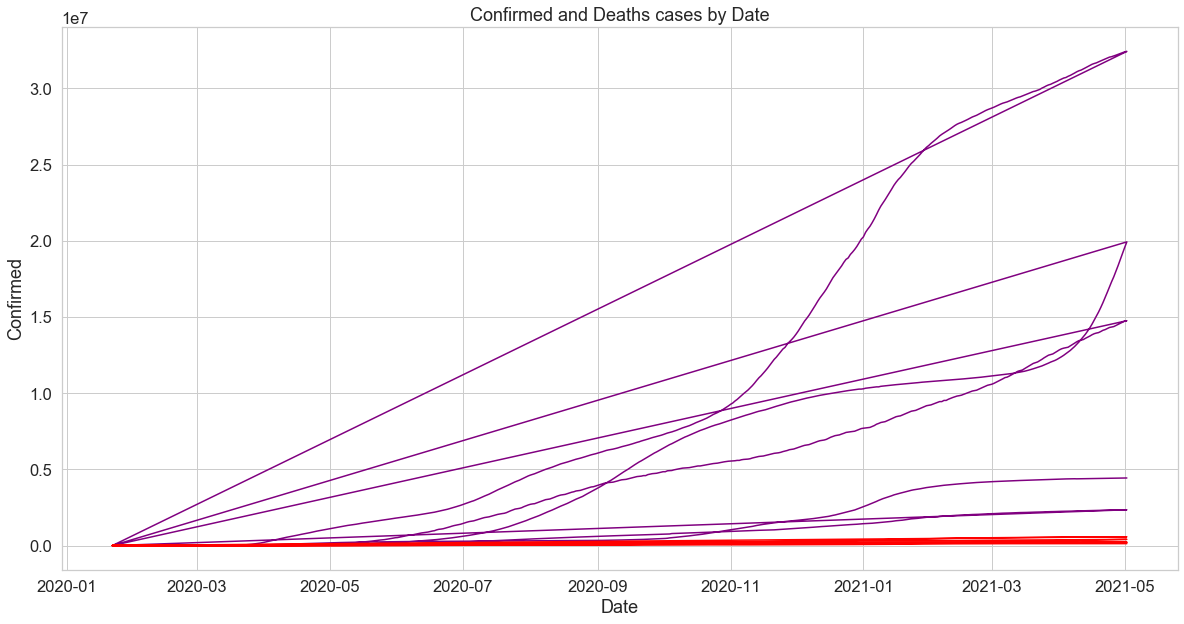

In [360]:

# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_top_countries['Date'],
        df_top_countries['Confirmed'],
        color='purple')

# Add x-axis and y-axis
ax.plot(df_top_countries['Date'],
        df_top_countries['Deaths'],
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Confirmed",
       title="Confirmed and Deaths cases by Date")

plt.show()

Brazil
India
Mexico
US
United Kingdom


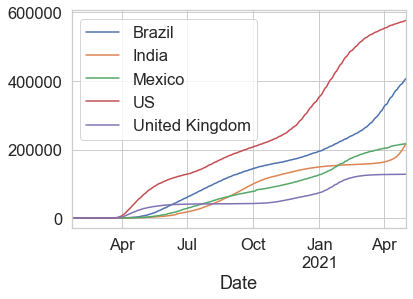

In [361]:


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='Deaths', ax=ax,label=n)

Brazil
France
India
Turkey
US


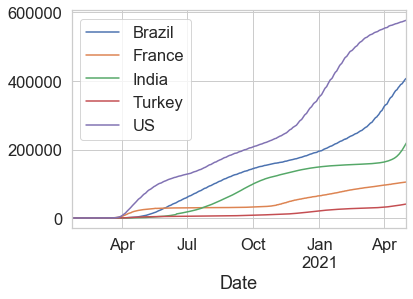

In [362]:
idxs = df_concatenated['Date'] == max_date

top_countries = df_concatenated[idxs].sort_values(['Confirmed', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

idxs = df_concatenated['Country'].isin(top_countries)

df_top_countries = df_concatenated[idxs]


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='Deaths', ax=ax,label=n)

## Top 10 Countries death_over_confirmed


In [363]:
idxs = df_concatenated['Date'] == max_date

top_countries = df_concatenated[idxs].sort_values(['death_over_confirmed', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

print(top_countries)
idxs = (df_concatenated['Country'].isin(top_countries)) & (df_concatenated['Date'] == max_date)

df_top_countries = df_concatenated[idxs]

df_top_countries


['Vanuatu', 'MS Zaandam', 'Yemen', 'Mexico', 'Sudan']


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
48567,MS Zaandam,2021-05-02,9,7,2,22.222222
53237,Mexico,2021-05-02,2348873,1869529,217233,9.248393
76120,Sudan,2021-05-02,33944,26795,2349,6.920222
84993,Vanuatu,2021-05-02,4,3,1,25.000000
86861,Yemen,2021-05-02,6341,2875,1233,19.444883


In [364]:
idxs = (df_concatenated['Date'] == max_date) & (df_concatenated['Confirmed'] > 10000)

top_countries = df_concatenated[idxs].sort_values(['death_over_confirmed', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

print(top_countries)
idxs = (df_concatenated['Country'].isin(top_countries)) & (df_concatenated['Date'] == max_date) & (df_concatenated['Confirmed'] > 10000)

df_top_countries = df_concatenated[idxs]

df_top_countries.sort_values(['death_over_confirmed', 'Country'], ascending=[False, True])


['Mexico', 'Sudan', 'Egypt', 'Somalia', 'Ecuador']


,Country,Date,Confirmed,Recovered,Deaths,death_over_confirmed
53237,Mexico,2021-05-02,2348873,1869529,217233,9.248393
76120,Sudan,2021-05-02,33944,26795,2349,6.920222
24750,Egypt,2021-05-02,229635,172342,13469,5.865395
73785,Somalia,2021-05-02,13915,5847,713,5.123967
24283,Ecuador,2021-05-02,387299,329582,18740,4.838639


# Get Vaccination Data

In [365]:
df_vaccination = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
df_vaccination.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


## Data cleaning

In [366]:
columns_to_delete = ['iso_code', 'date', 'daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million']

try:
    df_vaccination['Date'] =  pd.to_datetime(df_vaccination['date'], infer_datetime_format=True)
except: 
    pass


for c in columns_to_delete:
    try:
        df_vaccination = df_vaccination.drop(c, 1)
    except:
        pass


df_vaccination.columns = ['Country']  + df_vaccination.columns.tolist()[1:]

df_merged.groupby(['Country','Date'], as_index=False).sum()

df_vaccination.head()

,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
0,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,2021-02-22
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-23
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-24
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-25
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-26


## Delete non countries

In [367]:
idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries

['World', 'Asia', 'North America', 'China', 'United States', 'Europe', 'India', 'European Union', 'South America', 'Brazil', 'Germany', 'Turkey', 'Italy', 'Indonesia', 'Russia', 'Mexico', 'Africa', 'Canada', 'United Arab Emirates', 'Israel']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
173,Africa,1.795730e+07,12874229.0,4896743.0,1.34,0.96,0.37,2021-05-02
888,Asia,5.507761e+08,199531797.0,64466273.0,11.87,4.30,1.39,2021-05-02
2282,Brazil,4.317336e+07,29421191.0,13752165.0,20.31,13.84,6.47,2021-05-02
2654,Canada,1.382548e+07,12696698.0,1128778.0,36.63,33.64,2.99,2021-05-02
3055,China,2.753380e+08,NaN,NaN,19.13,NaN,NaN,2021-05-02
4715,Europe,2.304349e+08,163238581.0,66559916.0,30.78,21.80,8.89,2021-05-02
4842,European Union,1.502552e+08,109537497.0,40519806.0,33.77,24.62,9.11,2021-05-02
5534,Germany,3.014792e+07,23492053.0,6655866.0,35.98,28.04,7.94,2021-05-02
6731,India,1.542115e+08,126704151.0,27507360.0,11.17,9.18,1.99,2021-05-02
6842,Indonesia,2.017252e+07,12469406.0,7703110.0,7.38,4.56,2.82,2021-05-02


## Delete non-country data

In [368]:
non_countries = ['World', 'Asia', 'North America', 'Europe', 'European Union', 'South America', 'Africa']

df_vaccination = df_vaccination[~df_vaccination['Country'].isin(non_countries)]


In [369]:
# rename United States to USA

df_vaccination.loc[df_vaccination['Country'].isin(['United States']), 'Country'] = 'USA'


## Top total vaccinations

In [370]:
idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['total_vaccinations'], ascending=False)

['China', 'USA', 'India', 'Brazil', 'Germany', 'Turkey', 'Italy', 'Indonesia', 'Russia', 'Mexico', 'Canada', 'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Argentina', 'Hungary', 'Belgium', 'South Korea', 'Portugal', 'Czechia']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
3055,China,275338000.0,NaN,NaN,19.13,NaN,NaN,2021-05-02
15447,USA,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6731,India,154211511.0,126704151.0,27507360.0,11.17,9.18,1.99,2021-05-02
2282,Brazil,43173356.0,29421191.0,13752165.0,20.31,13.84,6.47,2021-05-02
5534,Germany,30147919.0,23492053.0,6655866.0,35.98,28.04,7.94,2021-05-02
14862,Turkey,23006734.0,13800405.0,9206329.0,27.28,16.36,10.92,2021-05-02
7463,Italy,20755863.0,14593168.0,6249347.0,34.33,24.14,10.34,2021-05-02
6842,Indonesia,20172516.0,12469406.0,7703110.0,7.38,4.56,2.82,2021-05-02
12241,Russia,20070743.0,12431003.0,7639740.0,13.75,8.52,5.24,2021-05-02
9386,Mexico,18326726.0,12572997.0,7650150.0,14.21,9.75,5.93,2021-05-02


## Top people fully vaccinations

In [371]:

idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['people_fully_vaccinated', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['people_fully_vaccinated'], ascending=False)

['USA', 'India', 'Brazil', 'Turkey', 'Indonesia', 'Mexico', 'Russia', 'Germany', 'Italy', 'Israel', 'Hungary', 'Canada', 'Czechia', 'Cambodia', 'Argentina', 'Portugal', 'Austria', 'Belgium', 'Uruguay', 'Qatar']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
15447,USA,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6731,India,154211511.0,126704151.0,27507360.0,11.17,9.18,1.99,2021-05-02
2282,Brazil,43173356.0,29421191.0,13752165.0,20.31,13.84,6.47,2021-05-02
14862,Turkey,23006734.0,13800405.0,9206329.0,27.28,16.36,10.92,2021-05-02
6842,Indonesia,20172516.0,12469406.0,7703110.0,7.38,4.56,2.82,2021-05-02
9386,Mexico,18326726.0,12572997.0,7650150.0,14.21,9.75,5.93,2021-05-02
12241,Russia,20070743.0,12431003.0,7639740.0,13.75,8.52,5.24,2021-05-02
5534,Germany,30147919.0,23492053.0,6655866.0,35.98,28.04,7.94,2021-05-02
7463,Italy,20755863.0,14593168.0,6249347.0,34.33,24.14,10.34,2021-05-02
7336,Israel,10458345.0,5403739.0,5054606.0,120.83,62.43,58.40,2021-05-02


## TOP total vaccinations per hundred

In [372]:

idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations_per_hundred', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['total_vaccinations_per_hundred'], ascending=False)

['Israel', 'United Arab Emirates', 'Bahrain', 'USA', 'Hungary', 'Curacao', 'Qatar', 'Uruguay', 'Mongolia', 'Canada', 'Lithuania', 'Germany', 'Austria', 'Estonia', 'Italy', 'Belgium', 'Finland', 'Portugal', 'Slovenia', 'Czechia']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
7336,Israel,10458345.0,5403739.0,5054606.0,120.83,62.43,58.40,2021-05-02
15194,United Arab Emirates,10634693.0,NaN,NaN,107.53,NaN,NaN,2021-05-02
1375,Bahrain,1264087.0,717024.0,547063.0,74.29,42.14,32.15,2021-05-02
15447,USA,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6501,Hungary,6150309.0,4073149.0,2077160.0,63.67,42.16,21.50,2021-05-02
3476,Curacao,97504.0,72861.0,24643.0,59.42,44.40,15.02,2021-05-02
11976,Qatar,1603913.0,1017019.0,586894.0,55.67,35.30,20.37,2021-05-02
15512,Uruguay,1834409.0,1165904.0,668505.0,52.81,33.56,19.24,2021-05-02
9627,Mongolia,1398592.0,947529.0,451063.0,42.66,28.90,13.76,2021-05-02
2654,Canada,13825476.0,12696698.0,1128778.0,36.63,33.64,2.99,2021-05-02


## TOP people fully vaccinated per hundred

In [373]:


idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['people_fully_vaccinated_per_hundred', 'Country'], ascending=[False, True]).head(20)['Country'].tolist()

print(top_countries)
idxs = (df_vaccination['Country'].isin(top_countries)) & (df_vaccination['Date'] == max_date)

df_top_countries = df_vaccination[idxs]

df_top_countries.sort_values(['people_fully_vaccinated_per_hundred'], ascending=False)

['Israel', 'Bahrain', 'USA', 'Hungary', 'Qatar', 'Uruguay', 'Curacao', 'Mongolia', 'Lithuania', 'Turkey', 'Italy', 'Slovenia', 'Austria', 'Czechia', 'Estonia', 'Slovakia', 'Portugal', 'Germany', 'Belgium', 'Hong Kong']


,Country,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,Date
7336,Israel,10458345.0,5403739.0,5054606.0,120.83,62.43,58.40,2021-05-02
1375,Bahrain,1264087.0,717024.0,547063.0,74.29,42.14,32.15,2021-05-02
15447,USA,245591469.0,147047012.0,104774652.0,73.43,43.97,31.33,2021-05-02
6501,Hungary,6150309.0,4073149.0,2077160.0,63.67,42.16,21.50,2021-05-02
11976,Qatar,1603913.0,1017019.0,586894.0,55.67,35.30,20.37,2021-05-02
15512,Uruguay,1834409.0,1165904.0,668505.0,52.81,33.56,19.24,2021-05-02
3476,Curacao,97504.0,72861.0,24643.0,59.42,44.40,15.02,2021-05-02
9627,Mongolia,1398592.0,947529.0,451063.0,42.66,28.90,13.76,2021-05-02
8634,Lithuania,995557.0,691403.0,304154.0,36.57,25.40,11.17,2021-05-02
14862,Turkey,23006734.0,13800405.0,9206329.0,27.28,16.36,10.92,2021-05-02


## Total vaccinations evolution in 5 Top Countries

Brazil
China
Germany
India
USA


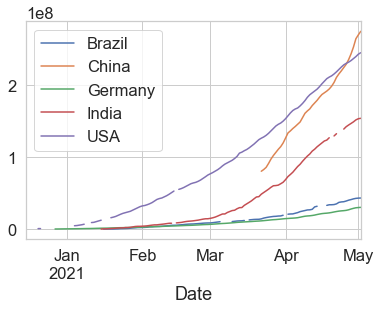

In [374]:
idxs = df_vaccination['Date'] == max_date

top_countries = df_vaccination[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

idxs = df_vaccination['Country'].isin(top_countries)

df_top_countries = df_vaccination[idxs]


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='total_vaccinations', ax=ax,label=n)

## I will use Confirmed from df_concatenated and total_vaccinations from df_vaccinations to analyze

In [375]:
fixed_columns = ['Country', 'Date']

df_to_analize = pd.merge(df_concatenated[fixed_columns +['Confirmed']], df_vaccination[fixed_columns + ['total_vaccinations']], on=fixed_columns )

print(df_to_analize.shape)

df_to_analize.head()

 

(12442, 4)


,Country,Date,Confirmed,total_vaccinations
0,Afghanistan,2021-02-22,55617,0.0
1,Afghanistan,2021-02-23,55646,NaN
2,Afghanistan,2021-02-24,55664,NaN
3,Afghanistan,2021-02-25,55680,NaN
4,Afghanistan,2021-02-26,55696,NaN


In [376]:
df_to_analize = df_to_analize.fillna(0)
df_to_analize.head(10)


,Country,Date,Confirmed,total_vaccinations
0,Afghanistan,2021-02-22,55617,0.0
1,Afghanistan,2021-02-23,55646,0.0
2,Afghanistan,2021-02-24,55664,0.0
3,Afghanistan,2021-02-25,55680,0.0
4,Afghanistan,2021-02-26,55696,0.0
5,Afghanistan,2021-02-27,55707,0.0
6,Afghanistan,2021-02-28,55714,8200.0
7,Afghanistan,2021-03-01,55733,0.0
8,Afghanistan,2021-03-02,55759,0.0
9,Afghanistan,2021-03-03,55770,0.0


Brazil
China
Germany
India
Turkey


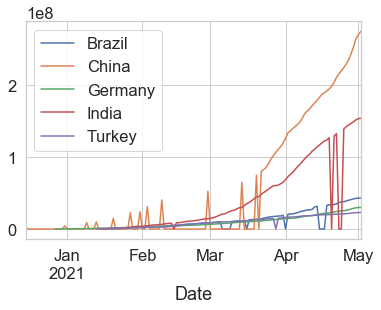

In [378]:
idxs = df_to_analize['Date'] == max_date

top_countries = df_to_analize[idxs].sort_values(['total_vaccinations', 'Country'], ascending=[False, True]).head(5)['Country'].tolist()

idxs = df_to_analize['Country'].isin(top_countries)

df_top_countries = df_to_analize[idxs]


fig,ax= plt.subplots()
for n, group in df_top_countries.groupby('Country'):
    print(n)
    group.plot(x='Date',y='total_vaccinations', ax=ax,label=n)